# Data visualization
Here, we perform EDA to gather information and visualizations of data prior modeling

In [3]:
# Fill these in with you own Spotify Developer References
CLIENT_ID = ''
CLIENT_SECRET = ''

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2022', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [24]:
len(artist_id)

1000

In [25]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,92,3TVXtAsR1Inumwj472S9r4
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32
4,Drake,Major Distribution,46s57QULU02Voy0Kup6UEb,90,3TVXtAsR1Inumwj472S9r4


In [26]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [27]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,87,"[dance pop, pop, uk pop]",20698155
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,[pop],61938852
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,92,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],268908
4,Drake,Major Distribution,46s57QULU02Voy0Kup6UEb,90,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658


In [28]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/341244446.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/341244446.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/341244446.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/341244446.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/341244446.py:8: FutureWarning:

The frame.append method is deprecated a

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4
1,0.637,0.643,4,-6.571,1,0.0519,0.13,0.000002,0.142,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4
2,0.561,0.52,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.15,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
3,0.571,0.544,6,-10.613,1,0.0299,0.453,0.00805,0.322,0.216,132.052,audio_features,1xK59OXxi2TAAAbmZK0kBL,spotify:track:1xK59OXxi2TAAAbmZK0kBL,https://api.spotify.com/v1/tracks/1xK59OXxi2TA...,https://api.spotify.com/v1/audio-analysis/1xK5...,132631,4
4,0.908,0.546,8,-10.491,0,0.323,0.0127,0,0.0707,0.225,131.016,audio_features,46s57QULU02Voy0Kup6UEb,spotify:track:46s57QULU02Voy0Kup6UEb,https://api.spotify.com/v1/tracks/46s57QULU02V...,https://api.spotify.com/v1/audio-analysis/46s5...,170502,4


In [29]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      999 non-null    object
 1   energy            999 non-null    object
 2   loudness          999 non-null    object
 3   speechiness       999 non-nul

In [30]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      999 non-null    object  
 1   energy            999 non-null    object  
 2   loudness          999 non-null    object  
 3   speechin

In [31]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
0,Unholy (feat. Kim Petras),Sam Smith
72,La Bachata,Manuel Turizo
88,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
22,I'm Good (Blue),David Guetta
1,Anti-Hero,Taylor Swift
8,Tití Me Preguntó,Bad Bunny
11,Me Porto Bonito,Bad Bunny
20,I Ain't Worried,OneRepublic
49,Efecto,Bad Bunny
50,CUFF IT,Beyoncé


In [32]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
657,104848718,89,Ed Sheeran,"['pop', 'uk pop']"
988,71598447,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
162,68670658,97,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
730,67321678,89,Justin Bieber,"['canadian pop', 'pop']"
119,61938852,100,Taylor Swift,['pop']
49,58836637,97,Bad Bunny,"['reggaeton', 'trap latino']"
405,57153603,90,BTS,"['k-pop', 'k-pop boy group']"
974,52318368,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
400,50912486,88,Rihanna,"['barbadian pop', 'dance pop', 'pop', 'urban c..."
138,43222738,87,Imagine Dragons,"['modern rock', 'rock']"


In [33]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      396
rap                      188
dance pop                118
hip hop                  107
trap                      93
canadian pop              82
trap latino               64
contemporary country      63
edm                       59
pop dance                 58
country                   52
uk pop                    47
big room                  47
reggaeton                 44
melodic rap               44
atl hip hop               43
nueva musica mexicana     40
canadian hip hop          37
r&b                       36
toronto rap               36
dtype: int64

Text(0.5, 1.0, 'Top genres')

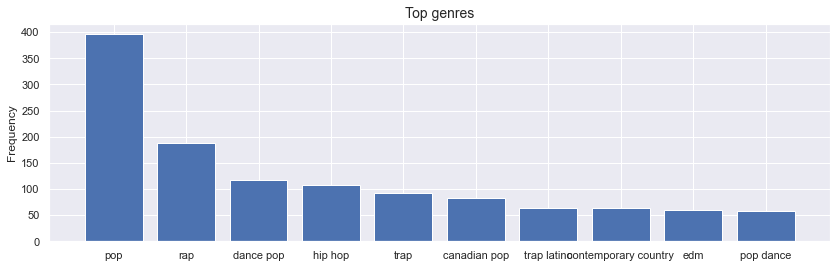

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [35]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Rihanna,dance pop
3,Drake,hip hop
4,Lil Uzi Vert,trap
5,Drake,canadian pop
6,Bad Bunny,trap latino
7,Luke Bryan,contemporary country
8,Marshmello,edm
9,Marshmello,pop dance


In [36]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Unholy (feat. Kim Petras),100,Sam Smith,pop
1,Rich Flex,92,Drake,rap
2,Unholy (feat. Kim Petras),100,Sam Smith,dance pop
3,Rich Flex,92,Drake,hip hop
4,WAIT FOR U (feat. Drake & Tems),88,Future,trap
5,Rich Flex,92,Drake,canadian pop
6,La Bachata,97,Manuel Turizo,trap latino
7,You Proof,84,Morgan Wallen,contemporary country
8,I'm Good (Blue),97,David Guetta,edm
9,I'm Good (Blue),97,David Guetta,pop dance


In [58]:
tf_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.714,0.472,-7.375,0.0864,0.013,0.000005,0.266,0.238,131.121,3nqQXoyQOWXiESFLlDF1hG,156943,4
1,0.637,0.643,-6.571,0.0519,0.13,0.000002,0.142,0.533,97.008,0V3wPSX9ygBnCm8psDIegu,200690,4
2,0.561,0.52,-9.342,0.244,0.0503,0.000002,0.355,0.424,153.15,1bDbXMyjaUIooNwFE9wn0N,239360,3
3,0.571,0.544,-10.613,0.0299,0.453,0.008050,0.322,0.216,132.052,1xK59OXxi2TAAAbmZK0kBL,132631,4
4,0.908,0.546,-10.491,0.323,0.0127,0.000000,0.0707,0.225,131.016,46s57QULU02Voy0Kup6UEb,170502,4
...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.811,0.728,-9.816,0.0702,0.241,0.001730,0.0669,0.576,111.997,1OiSTEB1SEaLGza2k4FIwo,380053,4
995,0.822,0.874,-4.006,0.113,0.0895,0.000004,0.0737,0.369,155.032,5OIz27S6SQOJtweneBd6QP,172053,4
996,0.588,0.496,-5.947,0.0417,0.00166,0.936000,0.186,0.582,128.001,7mLWNwcvwRdEviz6SfYp8A,146274,4
997,0.824,0.697,-4.869,0.0473,0.158,0.000041,0.077,0.757,99.988,7fYRg3CEbk6rNCuzNzMT06,214460,4


In [73]:
track_df

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,2wY79sveU1sp5g7SokKOiI,87,"[dance pop, pop, uk pop]",20698155
1,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,06HL4z0CvFAxyc27GXpf02,100,[pop],61938852
2,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,92,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
3,d4vd,Romantic Homicide,1xK59OXxi2TAAAbmZK0kBL,93,5y8tKLUfMvliMe8IKamR32,77,[bedroom pop],268908
4,Drake,Major Distribution,46s57QULU02Voy0Kup6UEb,90,3TVXtAsR1Inumwj472S9r4,97,"[canadian hip hop, canadian pop, hip hop, rap,...",68670658
...,...,...,...,...,...,...,...,...
995,DBN Gogo,Love & Loyalty (Believe),1OiSTEB1SEaLGza2k4FIwo,63,3Oa0mJQWQrUOqJ8fcLuu7l,52,[amapiano],451780
996,Kid Cudi,Do What I Want,5OIz27S6SQOJtweneBd6QP,69,0fA0VVWsXO9YnASrzqfmYu,81,"[hip hop, ohio hip hop, rap]",6129413
997,g3ox_em,GigaChad Theme - Phonk House Version,7mLWNwcvwRdEviz6SfYp8A,78,0Zw2ivPEDptvMHwCXjhdRs,60,[gym hardstyle],4267
998,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,77,7CajNmpbOovFoOoasH2HaY,83,"[dance pop, edm, electro house, house, pop, pr...",22951198


In [74]:
features1=['danceability','energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


#tf_df[features1].corr()
track_df.corr()
tf_df.corr()


,instrumentalness,duration_ms
instrumentalness,1.000000,-0.009468
duration_ms,-0.009468,1.000000


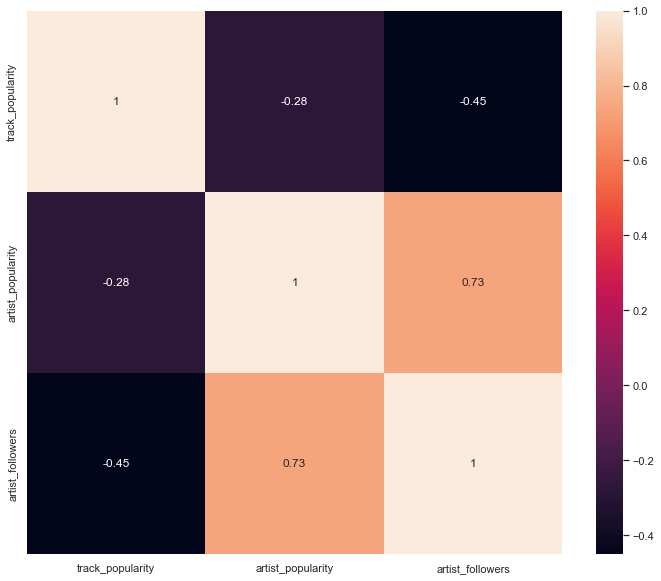

In [71]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(track_df.corr(), annot=True)
plt.show()

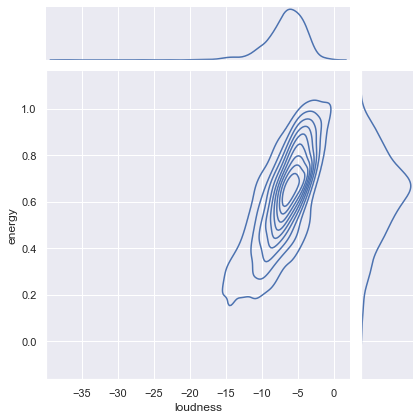

In [38]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

In [39]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



  danceability    energy speechiness acousticness instrumentalness  liveness  \
0      0.69911   0.60611    0.109699      0.23442         0.011374  0.183639   
1     0.656827  0.624534    0.113225       0.2266         0.021266  0.179606   

    valence  
0   0.43781  
1  0.477903  


/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1g/dn_fdr795vdgq1fc7vkqm3j00000gn/T/ipykernel_88288/3760115272.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [40]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Eminem The Monster
DNCE Toothbrush
Elton John Sad Songs (Say So Much)
Van Morrison Have I Told You Lately
Twenty One Pilots My Blood
Snakehips All My Friends (feat. Tinashe & Chance the Rapper)
The Chainsmokers Everybody Hates Me
Camila Cabello OMG (feat. Quavo)
Trey Songz Nobody Else but You
Blue Sorry Seems To Be The Hardest Word - Radio Edit
Lionel Richie Stuck On You
Chris Rea Let's Dance
Sam Smith Pray
John Lennon Watching The Wheels - Remastered 2010
Bryson Tiller Don't
League of Legends Legends Never Die
Trey Songz Slow Motion
DJ Snake You Know You Like It
Charlie Puth I Don’t Think That I Like Her
Halsey Bad At Love
Drake God's Plan
Fleetwood Mac Go Your Own Way - 2004 Remaster
Imagine Dragons Burn Out
Miley Cyrus We Can't Stop
Julia Michaels Worst In Me
A$AP Mob RAF (feat. A$AP Rocky, Playboi Carti, Quavo, Lil Uzi Vert & Frank Ocean)
Wet Wet Wet With A Little Help From My Friends
Roger Taylor We're All Just Trying To Get By
Imagine Dragons Tokyo
Cheat Codes Only You (with Litt